<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_50%25/Voting84_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 13 kB/s 
     |████████████████████████████████| 132 kB 48.6 MB/s 
     |████████████████████████████████| 14.8 MB 41.1 MB/s 
     |████████████████████████████████| 462 kB 41.2 MB/s 
     |████████████████████████████████| 1.2 MB 31.7 MB/s 
     |████████████████████████████████| 4.0 MB 45.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=2af2cea922e11a348aadbfd9e6599bb07a289db75e8d62641a800c990818f956
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score

In [20]:
df  = pd.read_csv("https://raw.githubusercontent.com/Noob919/Feature_selection/main/Data/house-votes-84.csv")
for i in range((len(df.columns))):
  if(df[df.columns[i]].dtype == 'object'):
    df[df.columns[i]] =  df[df.columns[i]].replace("?", df[df.columns[i]].value_counts().index[0])
for i in range((len(df.columns))):
   df[df.columns[i]]  =  LabelEncoder().fit_transform(df[df.columns[i]])
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [7]:
X = df.drop(['Class Name'],axis =1)
y = df['Class Name']

In [13]:
rank1 = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')
df_chi = df[rank1[:8].index]

In [14]:
X_col =  df_chi
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [15]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9655172413793104
Recall:  0.9428571428571428
Precision:  0.9705882352941176
[[51  1]
 [ 2 33]]


In [17]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [21]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 6s 109ms/step - loss: 0.7900 - accuracy: 0.4971 - val_loss: 0.7082 - val_accuracy: 0.4598
Epoch 2/100
11/11 [==============================] - 0s 14ms/step - loss: 0.6663 - accuracy: 0.6695 - val_loss: 0.6849 - val_accuracy: 0.7011
Epoch 3/100
11/11 [==============================] - 0s 25ms/step - loss: 0.6136 - accuracy: 0.6954 - val_loss: 0.6631 - val_accuracy: 0.7011
Epoch 4/100
11/11 [==============================] - 0s 20ms/step - loss: 0.5585 - accuracy: 0.7672 - val_loss: 0.6452 - val_accuracy: 0.7471
Epoch 5/100
11/11 [==============================] - 0s 21ms/step - loss: 0.4672 - accuracy: 0.8103 - val_loss: 0.6238 - val_accuracy: 0.7586
Epoch 6/100
11/11 [==============================] - 0s 19ms/step - loss: 0.4343 - accuracy: 0.8362 - val_loss: 0.5968 - val_accuracy: 0.7701
Epoch 7/100
11/11 [==============================] - 0s 17ms/step - loss: 0.4292 - accuracy: 0.8506 - val_loss: 0.5673 - val_accuracy: 0.8161
Epoch

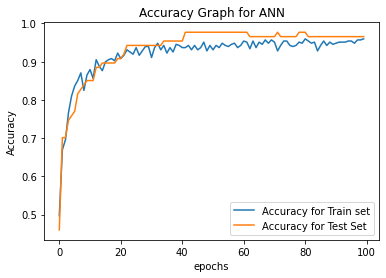

In [22]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

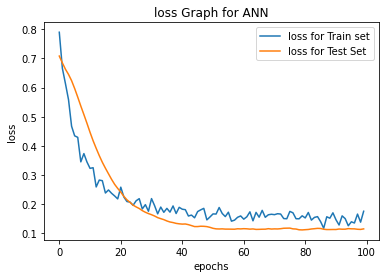

In [23]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [25]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9655172413793104
Recall:  0.9714285714285714
Precision:  0.9444444444444444
[[50  2]
 [ 1 34]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
rank2  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')
df_tree = df[rank2[0:8].index]
X_col =  df_tree
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [29]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9655172413793104
Recall:  0.9428571428571428
Precision:  0.9705882352941176
[[51  1]
 [ 2 33]]


In [30]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
batch_normalization_4 (Batch (None, 8)                 32        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
dense_10 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [32]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 2s 42ms/step - loss: 0.5505 - accuracy: 0.7098 - val_loss: 0.6178 - val_accuracy: 0.6437
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.4498 - accuracy: 0.7787 - val_loss: 0.5796 - val_accuracy: 0.6437
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3861 - accuracy: 0.8534 - val_loss: 0.5382 - val_accuracy: 0.8391
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.3704 - accuracy: 0.8448 - val_loss: 0.4964 - val_accuracy: 0.8506
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3130 - accuracy: 0.8994 - val_loss: 0.4562 - val_accuracy: 0.8736
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 0.3063 - accuracy: 0.8879 - val_loss: 0.4195 - val_accuracy: 0.8736
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2887 - accuracy: 0.9052 - val_loss: 0.3874 - val_accuracy: 0.8851
Epoch 8/100


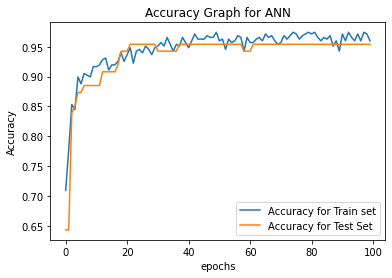

In [33]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

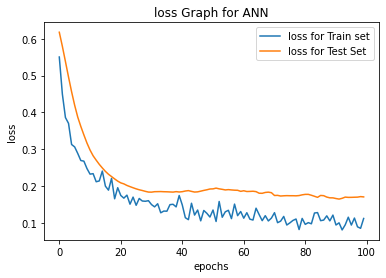

In [34]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [35]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9540229885057471
Recall:  0.9142857142857143
Precision:  0.9696969696969697
[[51  1]
 [ 3 32]]


In [39]:
rank3  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')
df_per_mean = df[rank3[0:8].index]
X_col =  df_per_mean
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [40]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [41]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_6 (Batch (None, 8)                 32        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_7 (Batch (None, 16)                64        
_________________________________________________________________
dense_14 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [43]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 38ms/step - loss: 0.9119 - accuracy: 0.4770 - val_loss: 0.7248 - val_accuracy: 0.4138
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.7594 - accuracy: 0.5805 - val_loss: 0.6647 - val_accuracy: 0.5977
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6695 - accuracy: 0.6207 - val_loss: 0.6074 - val_accuracy: 0.7701
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5405 - accuracy: 0.7098 - val_loss: 0.5540 - val_accuracy: 0.9195
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5038 - accuracy: 0.7328 - val_loss: 0.5024 - val_accuracy: 0.9310
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4613 - accuracy: 0.7845 - val_loss: 0.4539 - val_accuracy: 0.9425
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3915 - accuracy: 0.8276 - val_loss: 0.4099 - val_accuracy: 0.9540
Epoch 8/50
11/11 [=

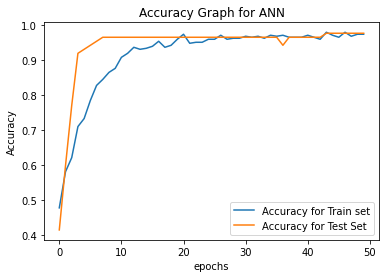

In [44]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

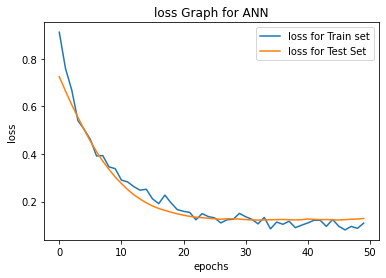

In [45]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [48]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
rank4  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df[rank4[0:8].index]
X_col =  df_per_std
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [51]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9655172413793104
Recall:  0.9714285714285714
Precision:  0.9444444444444444
[[50  2]
 [ 1 34]]


In [52]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_8 (Batch (None, 8)                 32        
_________________________________________________________________
dense_17 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_9 (Batch (None, 16)                64        
_________________________________________________________________
dense_18 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [54]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 37ms/step - loss: 0.7682 - accuracy: 0.5776 - val_loss: 0.6599 - val_accuracy: 0.6092
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5874 - accuracy: 0.6810 - val_loss: 0.5939 - val_accuracy: 0.7701
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5602 - accuracy: 0.7040 - val_loss: 0.5457 - val_accuracy: 0.7931
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4508 - accuracy: 0.8017 - val_loss: 0.5075 - val_accuracy: 0.9080
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4280 - accuracy: 0.8305 - val_loss: 0.4784 - val_accuracy: 0.9080
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4053 - accuracy: 0.8506 - val_loss: 0.4531 - val_accuracy: 0.9195
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3630 - accuracy: 0.8649 - val_loss: 0.4256 - val_accuracy: 0.9540
Epoch 8/50
11/11 [=

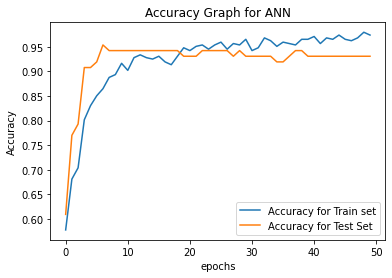

In [55]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

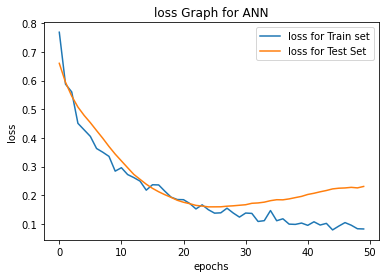

In [56]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [58]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9310344827586207
Recall:  0.9428571428571428
Precision:  0.8918918918918919
[[48  4]
 [ 2 33]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [60]:
rank5  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df[rank5[:8].index]
X_col =  df_pca
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [61]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [63]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_10 (Batc (None, 8)                 32        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_11 (Batc (None, 16)                64        
_________________________________________________________________
dense_22 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [65]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 36ms/step - loss: 0.6066 - accuracy: 0.6839 - val_loss: 0.5523 - val_accuracy: 0.8736
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 0.5064 - accuracy: 0.7328 - val_loss: 0.5247 - val_accuracy: 0.8736
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4799 - accuracy: 0.7816 - val_loss: 0.4960 - val_accuracy: 0.8621
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5081 - accuracy: 0.7845 - val_loss: 0.4687 - val_accuracy: 0.8966
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4177 - accuracy: 0.8305 - val_loss: 0.4464 - val_accuracy: 0.9195
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3933 - accuracy: 0.8420 - val_loss: 0.4261 - val_accuracy: 0.9655
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.3814 - accuracy: 0.8305 - val_loss: 0.4048 - val_accuracy: 0.9655
Epoch 8/50
11/11 [

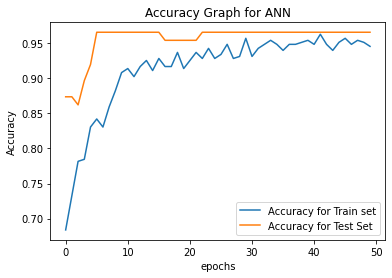

In [66]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

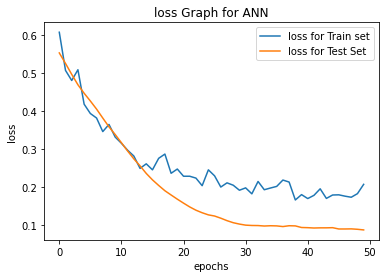

In [67]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


In [68]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9655172413793104
Recall:  0.9428571428571428
Precision:  0.9705882352941176
[[51  1]
 [ 2 33]]


In [70]:
rank6  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df[rank6[:8].index]
X_col =  df_f_test
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [71]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9655172413793104
Recall:  0.9714285714285714
Precision:  0.9444444444444444
[[50  2]
 [ 1 34]]


In [72]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_12 (Batc (None, 8)                 32        
_________________________________________________________________
dense_25 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_13 (Batc (None, 16)                64        
_________________________________________________________________
dense_26 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [74]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 1s 22ms/step - loss: 0.8137 - accuracy: 0.5029 - val_loss: 0.6724 - val_accuracy: 0.7011
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.5948 - val_loss: 0.6372 - val_accuracy: 0.8851
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.5705 - accuracy: 0.7069 - val_loss: 0.6008 - val_accuracy: 0.9540
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.7701 - val_loss: 0.5635 - val_accuracy: 0.9425
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4410 - accuracy: 0.8391 - val_loss: 0.5241 - val_accuracy: 0.9425
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.8621 - val_loss: 0.4811 - val_accuracy: 0.9425
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.3571 - accuracy: 0.8678 - val_loss: 0.4411 - val_accuracy: 0.9425
Epoch 8/50
11/11 [=

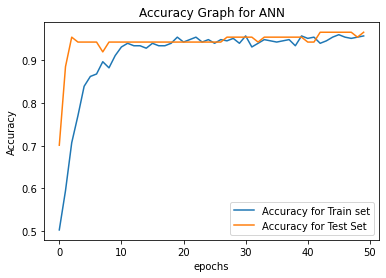

In [75]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

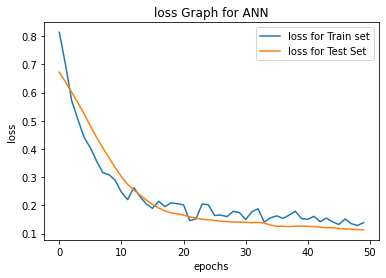

In [76]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [77]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9655172413793104
Recall:  0.9428571428571428
Precision:  0.9705882352941176
[[51  1]
 [ 2 33]]


In [83]:
rank7  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df[rank7[:8].index]
X_col =  df_mutual
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [84]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9655172413793104
Recall:  0.9714285714285714
Precision:  0.9444444444444444
[[50  2]
 [ 1 34]]


In [85]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_16 (Batc (None, 8)                 32        
_________________________________________________________________
dense_33 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_17 (Batc (None, 16)                64        
_________________________________________________________________
dense_34 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [87]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 24ms/step - loss: 0.7053 - accuracy: 0.5489 - val_loss: 0.6672 - val_accuracy: 0.6782
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6168 - accuracy: 0.6523 - val_loss: 0.6264 - val_accuracy: 0.8276
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.5055 - accuracy: 0.7414 - val_loss: 0.5855 - val_accuracy: 0.8276
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.7874 - val_loss: 0.5411 - val_accuracy: 0.8276
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4148 - accuracy: 0.8103 - val_loss: 0.4994 - val_accuracy: 0.8736
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4061 - accuracy: 0.8362 - val_loss: 0.4587 - val_accuracy: 0.8966
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: 0.3522 - accuracy: 0.8621 - val_loss: 0.4212 - val_accuracy: 0.9080
Epoch 8/50
11/11 [

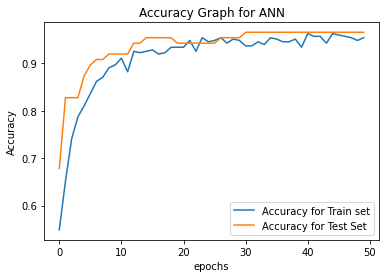

In [88]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

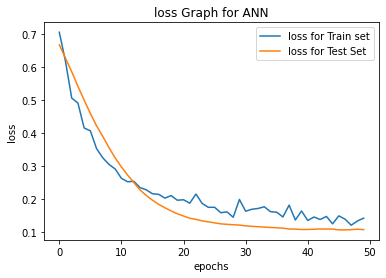

In [89]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [90]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9655172413793104
Recall:  0.9714285714285714
Precision:  0.9444444444444444
[[50  2]
 [ 1 34]]


In [91]:
rank8  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df[rank8[:8].index]
X_col =  df_pearson
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [92]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [93]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_18 (Batc (None, 8)                 32        
_________________________________________________________________
dense_37 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_19 (Batc (None, 16)                64        
_________________________________________________________________
dense_38 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                

In [95]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 36ms/step - loss: 0.7884 - accuracy: 0.4741 - val_loss: 0.6867 - val_accuracy: 0.5172
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6795 - accuracy: 0.5632 - val_loss: 0.6559 - val_accuracy: 0.7586
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5901 - accuracy: 0.6753 - val_loss: 0.6263 - val_accuracy: 0.7701
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 0.5304 - accuracy: 0.7443 - val_loss: 0.5996 - val_accuracy: 0.7701
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5029 - accuracy: 0.7787 - val_loss: 0.5685 - val_accuracy: 0.7701
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4544 - accuracy: 0.8391 - val_loss: 0.5383 - val_accuracy: 0.9080
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4050 - accuracy: 0.8736 - val_loss: 0.5069 - val_accuracy: 0.9080
Epoch 8/50
11/11 [

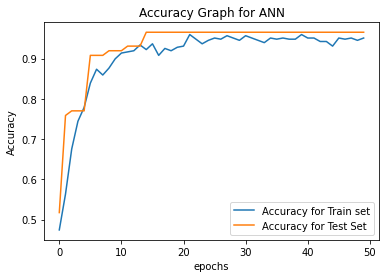

In [96]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

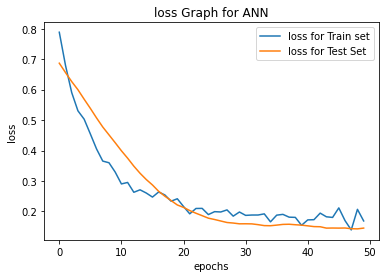

In [97]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [98]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9655172413793104
Recall:  0.9428571428571428
Precision:  0.9705882352941176
[[51  1]
 [ 2 33]]


In [106]:
OWA =  rank8  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "OWA_method").set_index('Attributes_Name')
df_owa  = df[OWA[:8].index]
X_col =  df_owa
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 8)
Shape of testing data (87, 8)


In [107]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ", recall_score(y_test,pred))
print("Precision: ", precision_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy:  0.9540229885057471
Recall:  0.9142857142857143
Precision:  0.9696969696969697
[[51  1]
 [ 3 32]]


In [108]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [109]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_20 (Batc (None, 8)                 32        
_________________________________________________________________
dense_41 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_21 (Batc (None, 16)                64        
_________________________________________________________________
dense_42 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)               

In [110]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 38ms/step - loss: 0.6436 - accuracy: 0.6523 - val_loss: 0.6687 - val_accuracy: 0.5862
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.4959 - accuracy: 0.7902 - val_loss: 0.6406 - val_accuracy: 0.6667
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4434 - accuracy: 0.8534 - val_loss: 0.6071 - val_accuracy: 0.6782
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3830 - accuracy: 0.8678 - val_loss: 0.5736 - val_accuracy: 0.9655
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3695 - accuracy: 0.8621 - val_loss: 0.5366 - val_accuracy: 0.9655
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3360 - accuracy: 0.8879 - val_loss: 0.4960 - val_accuracy: 0.9655
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3020 - accuracy: 0.9052 - val_loss: 0.4584 - val_accuracy: 0.9425
Epoch 8/50
11/11 [

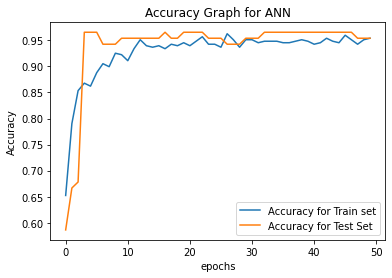

In [111]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

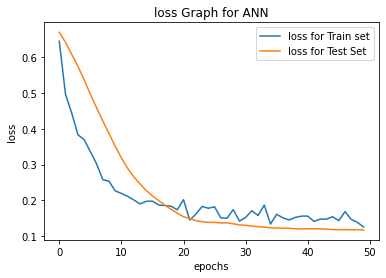

In [112]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [113]:
y_pred_ann_owa = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann_owa))
print("Recall: ", recall_score(y_test,y_pred_ann_owa))
print("Precision: ", precision_score(y_test,y_pred_ann_owa))
print(confusion_matrix(y_test,y_pred_ann_owa))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9540229885057471
Recall:  0.9714285714285714
Precision:  0.918918918918919
[[49  3]
 [ 1 34]]
